In [2]:
import pandas as pd

import numpy as np

from scipy.stats import pearsonr, linregress

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

import sqlite3

import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 3)})

In [4]:
latam = pd.read_csv("data/clean_latam.csv")
gdp_cols = ['gdp', 'gdpdelta', 'gdp%change']
lforce_cols = ['lforce', 'lforcedelta', 'lforce%change']
unemp_cols = ['unemp', 'unempdelta', 'unemp%change']
inflation_cols = ['inflation', 'inflationdelta', 'inflation%change']

We will analyse each economic indicator one by one, starting with GDP.   


# Analysing effect of tariffs on GDP
First we drop the rows that do not have data for that specific indicator.

Next, we generate 'lagged' tariff values by shifting the indicator 2 years backwards. We do this because the impact of tariffs changes are likely to be felt only in subsequent years.

Note that we are using deltas only (and not percentage changes) for GDP.  This is because the GDP information we are using is GDP-per-capita growth *rate*, i.e. this is already a %change in itself.  

In [5]:
#looking at impact of tariffs on GDP

gdp_latam = latam.drop(lforce_cols + unemp_cols + inflation_cols,  axis = 1)
gdp_latam = gdp_latam.dropna()

gdp_latam['gdpdelta_2yr'] = gdp_latam['gdpdelta'].shift(-2)
gdp_latam['gdp%change_2yr'] = gdp_latam['gdp%change'].shift(-2)

Taking a quick look at the effect of tariffs on the delta 

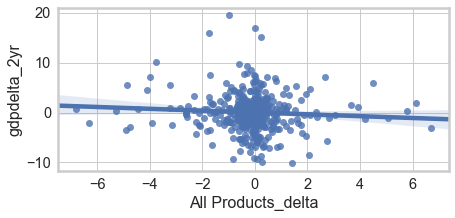

In [6]:
sns.regplot(data =gdp_latam, x = "All Products_delta", y = "gdpdelta_2yr")

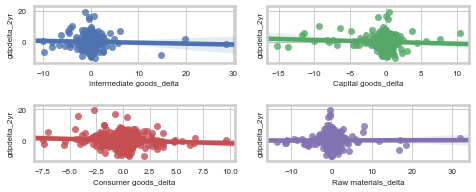

In [7]:
import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size 

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

sns.regplot(data =gdp_latam, x = "Intermediate goods_delta", y = "gdpdelta_2yr", ax=axes[0,0])
sns.regplot(data =gdp_latam, x = "Capital goods_delta", y = "gdpdelta_2yr", ax=axes[0,1])
sns.regplot(data =gdp_latam, x = "Consumer goods_delta", y = "gdpdelta_2yr", ax=axes[1,0])
sns.regplot(data =gdp_latam, x = "Raw materials_delta", y = "gdpdelta_2yr", ax=axes[1,1])


plt.tight_layout()

Overall, we can see a slight negative relationship between the changes in GDP-per-capita growth rates, and tariff changes.  However there is a huge clustering of tariff changes around 0, i.e. low levels of tariff changes.  

Indeed, when we look at a regression of GDP on tariff changes, we find that there is no significant relationship.  

In [8]:
ols = smf.ols(formula = "GDP ~ AP + KG + IG + CG + RM", 
              data = gdp_latam.rename(columns = {"gdpdelta_2yr" : "GDP", 
                                          "All Products_delta"  : "AP",
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()


## G7 analysis

In [9]:
g7 = pd.read_csv("data/clean_g7.csv")

In [10]:
#looking at impact of tariffs on GDP

gdp_g7 = g7.drop(lforce_cols + unemp_cols + inflation_cols,  axis = 1)
gdp_g7 = gdp_g7.dropna()

gdp_g7['gdpdelta_2yr'] = gdp_g7['gdpdelta'].shift(-2)
gdp_g7['gdp%change_2yr'] = gdp_g7['gdp%change'].shift(-2)

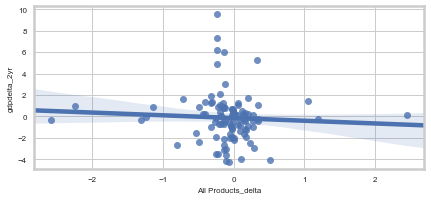

In [11]:
sns.regplot(data =gdp_g7, x = "All Products_delta", y = "gdpdelta_2yr")

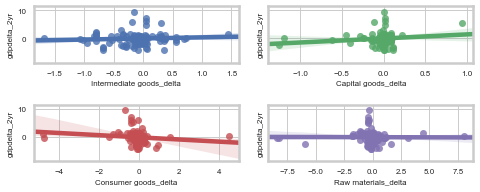

In [12]:
import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size 

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

sns.regplot(data =gdp_g7, x = "Intermediate goods_delta", y = "gdpdelta_2yr", ax=axes[0,0])
sns.regplot(data =gdp_g7, x = "Capital goods_delta", y = "gdpdelta_2yr", ax=axes[0,1])
sns.regplot(data =gdp_g7, x = "Consumer goods_delta", y = "gdpdelta_2yr", ax=axes[1,0])
sns.regplot(data =gdp_g7, x = "Raw materials_delta", y = "gdpdelta_2yr", ax=axes[1,1])


plt.tight_layout()

In [13]:
ols = smf.ols(formula = "GDP ~ AP + KG + IG + CG + RM", 
              data = gdp_g7.rename(columns = {"gdpdelta_2yr" : "GDP", 
                                          "All Products_delta"  : "AP",
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.465
Date:                Tue, 28 Nov 2017   Prob (F-statistic):              0.208
Time:                        11:18:17   Log-Likelihood:                -226.51
No. Observations:                 103   AIC:                             465.0
Df Residuals:                      97   BIC:                             480.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0721      0.231     -0.312      0.756      -0.531       0.387
AP            -1.3552      2.135     -0.635      0.527      -5.593       2.882
KG             1.8568      1.332      1.394      0.166      -0.787       4.500
IG             0.9207      0.802      1.148      0.254      -0.672       2.513
CG            -0.2332      0.770     -0.303      0.763      -1.762       1.295
RM             0.3003      0.322      0.934      0.353      -0.338       0.939
==============================================================================
Omnibus:                       36.230   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.466
Skew:                           1.296   Prob(JB):                     6.16e-20
Kurtosis:                       6.728   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r-square for developed countries is higher than that for LatAm countries but the results are still not significant.  

## Categorizing into tariff increases/decreases 


Given the clustering of datapoints around zero tariff changes, we decided to classify tariff changes into increases/decreases, and look only at those that had at least 5% changes in tariff rates.  

Similarly, GDP growth is classified into increases/decreases. 


In [14]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    gdp_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in gdp_latam[col+'_%change']]
    
gdp_latam["gdp_cat"] = ['increase' if x > 0.5 else 'same' if x >-0.5 else 'decrease' for x in gdp_latam['gdpdelta_2yr']]

In [15]:
df0 = gdp_latam.groupby(["All Products_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df1 = gdp_latam.groupby(["Intermediate goods_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df2 = gdp_latam.groupby(["Consumer goods_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df3 = gdp_latam.groupby(["Capital goods_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df4 = gdp_latam.groupby(["Raw materials_cat", "gdp_cat"]).size().unstack(fill_value = 0)

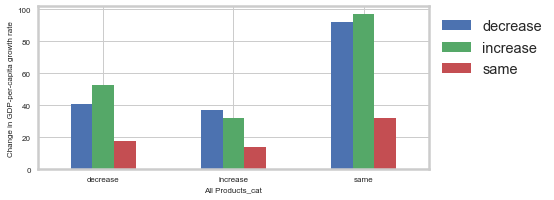

In [16]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Change in GDP-per-capita growth rate")

### We can see that a decrease in tariffs is associated with increased GDP-per-capita growth and vice-versa.  

Breaking down into sub-categories of tariffs

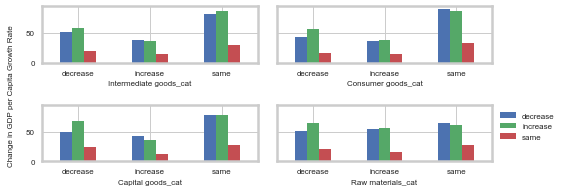

In [17]:
import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size 
mpl.rcParams['legend.fontsize'] = label_size


 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
df1.plot(kind = "bar", rot=0, ax=axes[0,0], legend = False)
df2.plot(kind = "bar", rot=0, ax=axes[0,1], legend = False)
df3.plot(kind = "bar", rot=0, ax=axes[1,0], legend = False)
df4.plot(kind = "bar", rot=0, ax=axes[1,1], legend = False)

plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
fig.text(0, 0.5, 'Change in GDP per Capita Growth Rate', va='center', rotation='vertical', size = 8)


In [18]:
ols = smf.ols(formula = "C(GDP) ~ C(AP)", 
              data = gdp_latam.rename(columns = {"gdp_cat" : "GDP", 
                                          "All Products_cat"  : "AP"}))
model = ols.fit()


## G7 GDP

In [19]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    gdp_g7[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in gdp_g7[col+'_%change']]
    
gdp_g7["gdp_cat"] = ['increase' if x > 0.5 else 'same' if x >-0.5 else 'decrease' for x in gdp_g7['gdpdelta_2yr']]

In [20]:
df0 = gdp_g7.groupby(["All Products_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df1 = gdp_g7.groupby(["Intermediate goods_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df2 = gdp_g7.groupby(["Consumer goods_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df3 = gdp_g7.groupby(["Capital goods_cat", "gdp_cat"]).size().unstack(fill_value = 0)
df4 = gdp_g7.groupby(["Raw materials_cat", "gdp_cat"]).size().unstack(fill_value = 0)

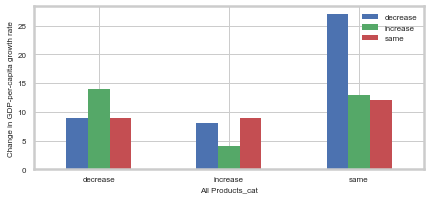

In [21]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Change in GDP-per-capita growth rate")

From the graph above, we can see that the effects are consistent with those for LatAm countries, and possibly more pronounced.
An interesting observation: if tariffs were kept at relatively constant levels, the likelihood of slowing growth is higher for G7 countries vis-a-vis LatAm.  

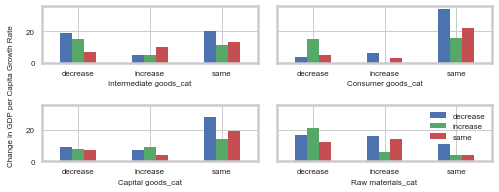

In [22]:
 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
df1.plot(kind = "bar", rot=0, ax=axes[0,0], legend = False)
df2.plot(kind = "bar", rot=0, ax=axes[0,1], legend = False)
df3.plot(kind = "bar", rot=0, ax=axes[1,0], legend = False)
df4.plot(kind = "bar", rot=0, ax=axes[1,1], legend = False)

plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
fig.text(0, 0.5, 'Change in GDP per Capita Growth Rate', va='center', rotation='vertical', size = 8)


## Analysis with unemployment

In [14]:

unemp_latam = latam.drop(lforce_cols + gdp_cols + inflation_cols,  axis = 1)
unemp_latam = unemp_latam.dropna()

unemp_latam['unempdelta_2yr'] = unemp_latam['unempdelta'].shift(-2)
unemp_latam['unemp%change_2yr'] = unemp_latam['unemp%change'].shift(-2)


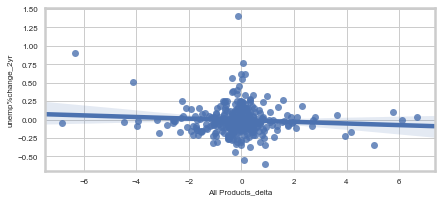

In [15]:
sns.regplot(data =unemp_latam, x = "All Products_delta", y = "unemp%change_2yr")

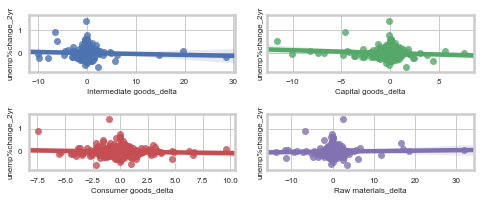

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

sns.regplot(data =unemp_latam, x = "Intermediate goods_delta", y = "unemp%change_2yr", ax=axes[0,0])
sns.regplot(data =unemp_latam, x = "Capital goods_delta", y = "unemp%change_2yr", ax=axes[0,1])
sns.regplot(data =unemp_latam, x = "Consumer goods_delta", y = "unemp%change_2yr", ax=axes[1,0])
sns.regplot(data =unemp_latam, x = "Raw materials_delta", y = "unemp%change_2yr", ax=axes[1,1])


plt.tight_layout()

In [17]:
ols = smf.ols(formula = "UNEMP ~ AP + KG + IG + CG + RM", 
              data = unemp_latam.rename(columns = {"unemp%change_2yr" : "UNEMP", 
                                          "All Products_delta"  : "AP",
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
# model.summary()

In [18]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    unemp_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in unemp_latam[col+'_%change']]
    
unemp_latam["unemp_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in unemp_latam['unemp%change_2yr']]

df0 = unemp_latam.groupby(["All Products_cat", "unemp_cat"]).size().unstack(fill_value = 0)
df1 = unemp_latam.groupby(["Intermediate goods_cat", "unemp_cat"]).size().unstack(fill_value = 0)
df2 = unemp_latam.groupby(["Consumer goods_cat", "unemp_cat"]).size().unstack(fill_value = 0)
df3 = unemp_latam.groupby(["Capital goods_cat", "unemp_cat"]).size().unstack(fill_value = 0)
df4 = unemp_latam.groupby(["Raw materials_cat", "unemp_cat"]).size().unstack(fill_value = 0)

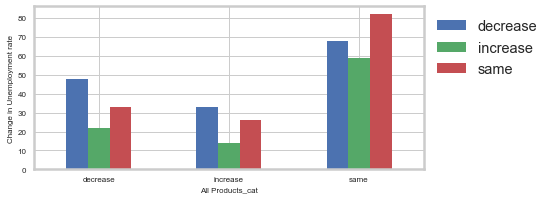

In [19]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Change in Unemployment rate")

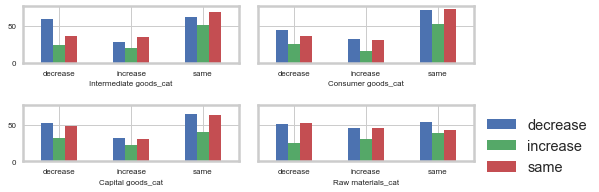

In [20]:
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size 

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
df1.plot(kind = "bar", rot=0, ax=axes[0,0], legend = False)
df2.plot(kind = "bar", rot=0, ax=axes[0,1], legend = False)
df3.plot(kind = "bar", rot=0, ax=axes[1,0], legend = False)
df4.plot(kind = "bar", rot=0, ax=axes[1,1], legend = False)

plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()

## Analysis with labor force

In [21]:

lforce_latam = latam.drop(unemp_cols + gdp_cols + inflation_cols,  axis = 1)
lforce_latam = lforce_latam.dropna()

lforce_latam['lforcedelta_2yr'] = lforce_latam['lforcedelta'].shift(-2)
lforce_latam['lforce%change_2yr'] = lforce_latam['lforce%change'].shift(-2)


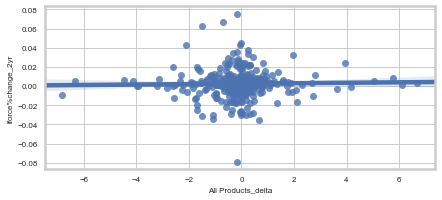

In [22]:
sns.regplot(data =lforce_latam, x = "All Products_delta", y = "lforce%change_2yr")

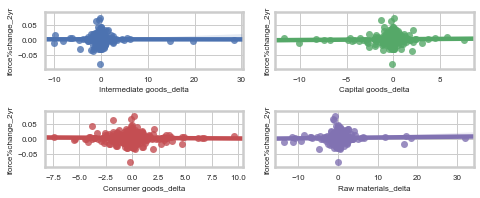

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

sns.regplot(data =lforce_latam, x = "Intermediate goods_delta", y = "lforce%change_2yr", ax=axes[0,0])
sns.regplot(data =lforce_latam, x = "Capital goods_delta", y = "lforce%change_2yr", ax=axes[0,1])
sns.regplot(data =lforce_latam, x = "Consumer goods_delta", y = "lforce%change_2yr", ax=axes[1,0])
sns.regplot(data =lforce_latam, x = "Raw materials_delta", y = "lforce%change_2yr", ax=axes[1,1])


plt.tight_layout()

In [24]:
ols = smf.ols(formula = "LFORCE ~ AP + KG + IG + CG + RM", 
              data = lforce_latam.rename(columns = {"lforce%change_2yr" : "LFORCE", 
                                          "All Products_delta"  : "AP",
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
# model.summary()

In [25]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    lforce_latam[col+"_cat"] = ['increase' if x > 0.05 else 'same' if x>-0.05 else 'decrease' for x in lforce_latam[col+'_%change']]
    
lforce_latam["lforce_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in lforce_latam['lforce%change_2yr']]

df0 = lforce_latam.groupby(["All Products_cat", "lforce_cat"]).size().unstack(fill_value = 0)
df1 = lforce_latam.groupby(["Intermediate goods_cat", "lforce_cat"]).size().unstack(fill_value = 0)
df2 = lforce_latam.groupby(["Consumer goods_cat", "lforce_cat"]).size().unstack(fill_value = 0)
df3 = lforce_latam.groupby(["Capital goods_cat", "lforce_cat"]).size().unstack(fill_value = 0)
df4 = lforce_latam.groupby(["Raw materials_cat", "lforce_cat"]).size().unstack(fill_value = 0)

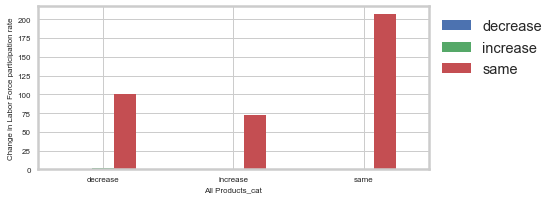

In [26]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Change in Labor Force participation rate")

As the changes in lforce participation rate is too small, we lowered the thresholds:

In [27]:
lforce_latam["lforce2_cat"] = ['increase' if x > 0 else 'decrease' for x in lforce_latam['lforce%change_2yr']]

df0 = lforce_latam.groupby(["All Products_cat", "lforce2_cat"]).size().unstack(fill_value = 0)
df1 = lforce_latam.groupby(["Intermediate goods_cat", "lforce2_cat"]).size().unstack(fill_value = 0)
df2 = lforce_latam.groupby(["Consumer goods_cat", "lforce2_cat"]).size().unstack(fill_value = 0)
df3 = lforce_latam.groupby(["Capital goods_cat", "lforce2_cat"]).size().unstack(fill_value = 0)
df4 = lforce_latam.groupby(["Raw materials_cat", "lforce2_cat"]).size().unstack(fill_value = 0)

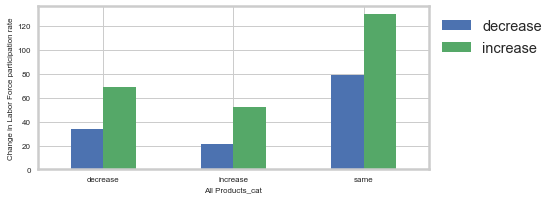

In [28]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Change in Labor Force participation rate")

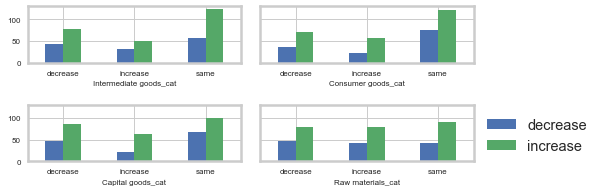

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
df1.plot(kind = "bar", rot=0, ax=axes[0,0], legend = False)
df2.plot(kind = "bar", rot=0, ax=axes[0,1], legend = False)
df3.plot(kind = "bar", rot=0, ax=axes[1,0], legend = False)
df4.plot(kind = "bar", rot=0, ax=axes[1,1], legend = False)

plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()

## Analysis with inflation 

In [30]:
inflation_latam = latam.drop(unemp_cols + gdp_cols + lforce_cols,  axis = 1)
inflation_latam = inflation_latam.dropna()

inflation_latam['inflationdelta_2yr'] = inflation_latam['inflationdelta'].shift(-2)
inflation_latam['inflation%change_2yr'] = inflation_latam['inflation%change'].shift(-2)

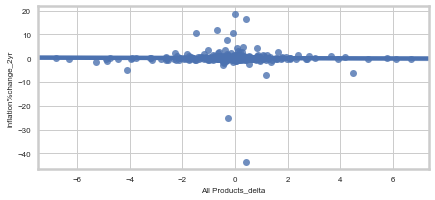

In [31]:
sns.regplot(data =inflation_latam, x = "All Products_delta", y = "inflation%change_2yr")

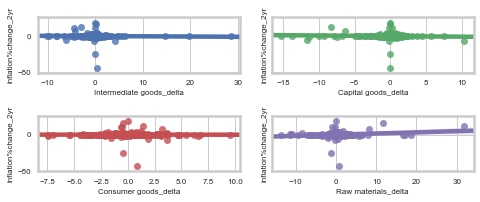

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)

sns.regplot(data =inflation_latam, x = "Intermediate goods_delta", y = "inflation%change_2yr", ax=axes[0,0])
sns.regplot(data =inflation_latam, x = "Capital goods_delta", y = "inflation%change_2yr", ax=axes[0,1])
sns.regplot(data =inflation_latam, x = "Consumer goods_delta", y = "inflation%change_2yr", ax=axes[1,0])
sns.regplot(data =inflation_latam, x = "Raw materials_delta", y = "inflation%change_2yr", ax=axes[1,1])


plt.tight_layout()

In [33]:
ols = smf.ols(formula = "INFLATION ~ AP + KG + IG + CG + RM", 
              data = inflation_latam.rename(columns = {"inflation%change_2yr" : "INFLATION", 
                                          "All Products_delta"  : "AP",
                                          "Capital goods_delta" : "KG",
                                          "Intermediate goods_delta" : "IG",
                                          "Consumer goods_delta" : "CG",
                                          "Raw materials_delta" : "RM"}))
model = ols.fit()
# model.summary()

## significant relationship between raw material tariffs and inflation!

In [34]:
cat_cols = ['All Products', 'Capital goods', 'Intermediate goods',
           'Consumer goods', 'Raw materials']

for col in cat_cols:
    inflation_latam[col+"_cat"] = ['increase' if x > 0.03 else 'same' if x>-0.03 else 'decrease' for x in inflation_latam[col+'_%change']]
    
inflation_latam["inflation_cat"] = ['increase' if x > 0.05 else 'same' if x >-0.05 else 'decrease' for x in inflation_latam['inflation%change_2yr']]

df0 = inflation_latam.groupby(["All Products_cat", "inflation_cat"]).size().unstack(fill_value = 0)
df1 = inflation_latam.groupby(["Intermediate goods_cat", "inflation_cat"]).size().unstack(fill_value = 0)
df2 = inflation_latam.groupby(["Consumer goods_cat", "inflation_cat"]).size().unstack(fill_value = 0)
df3 = inflation_latam.groupby(["Capital goods_cat", "inflation_cat"]).size().unstack(fill_value = 0)
df4 = inflation_latam.groupby(["Raw materials_cat", "inflation_cat"]).size().unstack(fill_value = 0)

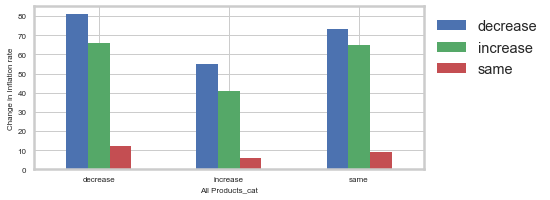

In [35]:
ax = df0.plot(kind = "bar", rot=0)
plt.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Change in Inflation rate")

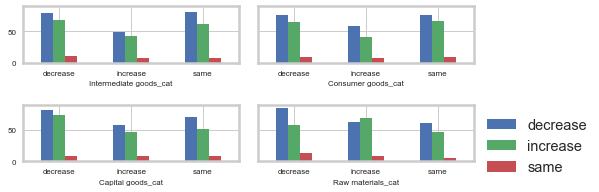

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = True)
df1.plot(kind = "bar", rot=0, ax=axes[0,0], legend = False)
df2.plot(kind = "bar", rot=0, ax=axes[0,1], legend = False)
df3.plot(kind = "bar", rot=0, ax=axes[1,0], legend = False)
df4.plot(kind = "bar", rot=0, ax=axes[1,1], legend = False)

plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()